In [2]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd , numpy as np
import plotly.express as px
#!pip install unidecode


# CSV dosyasının yolu
'''
dosya_yolu = '/content/drive/MyDrive/CSV/FM 2023.csv'

# CSV dosyasını oku
head = pd.read_csv(dosya_yolu)
fm=head.copy()


Gerçek veri setimizin üstünde işlem yapmamak için başka bir yere kopyaladık:

In [ ]:
'''
headers={
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"

}


In [ ]:
'''
from unidecode import unidecode

def Convert_to_latin(string):
    return unidecode(string)


In [ ]:
'''
import requests
from bs4 import BeautifulSoup
import re

def Convert_to_latin(text):
    return unidecode(text)

def Find_Player_Url(player_name):
    search_url = f"https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query={player_name}&x=0&y=0"

    # Headers tanımlama
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    try:
        response = requests.get(search_url, headers=headers)

        if response.status_code == 200:
            html_content = response.content
            soup = BeautifulSoup(html_content, 'html.parser')

            # Oyuncu adına göre ilk sonuçtan URL'yi çıkartma
            player_link = soup.find('a', {'title': player_name})

            if player_link:
                player_url = player_link['href']
                full_url = f"https://www.transfermarkt.com{player_url}"
                return full_url
            else:
                # Oyuncu bağlantısı bulunamadı, Latin alfabesine çevrilmiş oyuncu adı ile tekrar dene
                latin_player_name = Convert_to_latin(player_name)
                if latin_player_name != player_name:
                    return Find_Player_Url(latin_player_name)
                else:
                    print("Oyuncu bağlantısı bulunamadı.")
        else:
            print(f"HTTP Hatası: {response.status_code}")
    except Exception as e:
        print(f"Hata oluştu: {e}")



In [ ]:
'''
def Find_Player_UrlDetail(player_name):
    search_url = f"https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query={player_name}&x=0&y=0"

    # Headers tanımlama
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    try:
        response = requests.get(search_url, headers=headers)

        if response.status_code == 200:
            html_content = response.content
            soup = BeautifulSoup(html_content, 'html.parser')

            # Oyuncu adına göre ilk sonuçtan URL'yi çıkartma
            #player_link = soup.find('a', {'class': 'spielprofil_tooltip', 'title': player_name})
            player_link = soup.find('a', {'title': player_name, 'href': re.compile(r'/profil/spieler/\d+')})



            if player_link:

                player_url = player_link['href']
                full_url = f"https://www.transfermarkt.com{player_url}"

                return full_url
            else:
                # Arama sonuçlarını kontrol et
                search_results = soup.find('div', {'class': 'search-results'})
                print(search_results)
        else:
            print(f"HTTP Hatası: {response.status_code}")
    except Exception as e:
        basic_url=Find_Player_Url(player_name)
        print(f"Hata oluştu: {e}")
        return basic_url



None
Mehdi Ghaedi'nin Transfermarkt profili: None


In [ ]:
'''
def Get_Market_Value(player_name):

    url = Find_Player_Url(player_name)

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")

    market_value_element = soup.find('a', class_='data-header__market-value-wrapper')

    if market_value_element:
        market_value_text = market_value_element.text.strip()
        numeric_part = re.search(r'\d+\.\d+|\d+', market_value_text)
        market_value = float(numeric_part.group()) if numeric_part else None
        return market_value
    else:
        return 0


market_value_result = Get_Market_Value("Neymar")

if market_value_result is not None:
    print("Market Value:", market_value_result)
else:
    print("Market value element not found.")

Market Value: 45.0


In [ ]:
'''
fm['Values'] = fm['Values'].astype(float)
fm.info()

In [ ]:
#hatasayacı=0

In [ ]:
'''
for satir_indeksi, satir in df.iterrows():

    try:

        # Her satır için bir işlem yapalım (örneğin, Name ve Values sütunlarını yazdıralım)
        sutun_adi = 'Values'
        istenen_deger = Get_Market_Value(fm.iloc[satir_indeksi]["Name"])  # Değiştirmek istediğiniz yeni değer
        if(istenen_deger>181):
          istenen_deger=istenen_deger/1000


        fm.at[satir_indeksi, sutun_adi] = istenen_deger
        print(str(fm.iloc[satir_indeksi]["Name"]) +" " +str(fm.iloc[satir_indeksi]["Values"]))


        fm.to_csv('/content/drive/MyDrive/CSV/fmValues.csv', index=False)


    except Exception as e:
        print("Hata:", e)
        print("Hata Alınan index değeri"+str(satir_indeksi))
        print(hatasayacı)
        hatasayacı+=1
        continue  # Hata alındığında döngüyü sonraki satıra geçerek devam ettir

print("Döngü tamamlandı.")

In [ ]:
'''
buyuk_oyuncular = df[df['Values'] > 181]

print(buyuk_oyuncular)

In [ ]:
'''
for satir_indeksi, satir in buyuk_oyuncular.iterrows():

    try:

        # Her satır için bir işlem yapalım (örneğin, Name ve Values sütunlarını yazdıralım)
        sutun_adi = 'Values'
        istenen_deger = Get_Market_Value(fm.iloc[satir_indeksi]["Name"])  # Değiştirmek istediğiniz yeni değer
        if(istenen_deger>181):
          istenen_deger=istenen_deger/1000


        fm.at[satir_indeksi, sutun_adi] = istenen_deger
        print(str(fm.iloc[satir_indeksi]["Name"]) +" " +str(fm.iloc[satir_indeksi]["Values"]))


        fm.to_csv('/content/drive/MyDrive/CSV/fmValues.csv', index=False)


    except Exception as e:
        print("Hata:", e)
        print("Hata Alınan index değeri"+str(satir_indeksi))
        print(hatasayacı)
        hatasayacı+=1
        continue  # Hata alındığında döngüyü sonraki satıra geçerek devam ettir

print("Döngü tamamlandı.")

In [4]:
dosya_yolu = '/content/drive/MyDrive/CSV/fmValues.csv'
import pandas as pd
import matplotlib.pyplot as plt
#DFyi yeniden tanımladık üstteki part verileri çevirmek olduğu için
# CSV dosyasını oku
df = pd.read_csv(dosya_yolu)

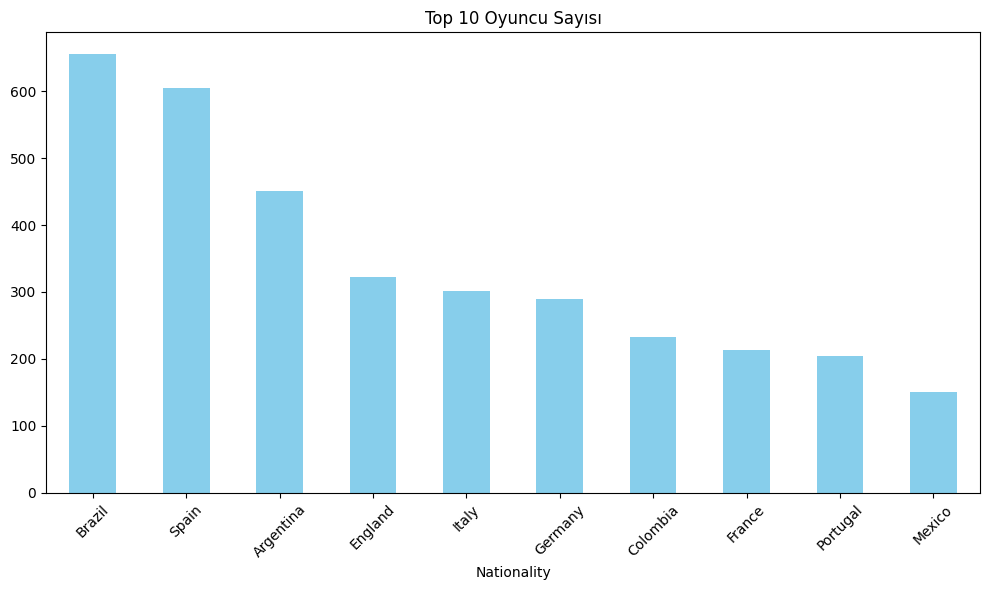

In [5]:
# Milliyetlere göre kişi sayılarını hesaplamak
nationality_counts = df['Nationality'].value_counts()

# Grafiği çizmek
plt.figure(figsize=(10, 6))
nationality_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Oyuncu Sayısı')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

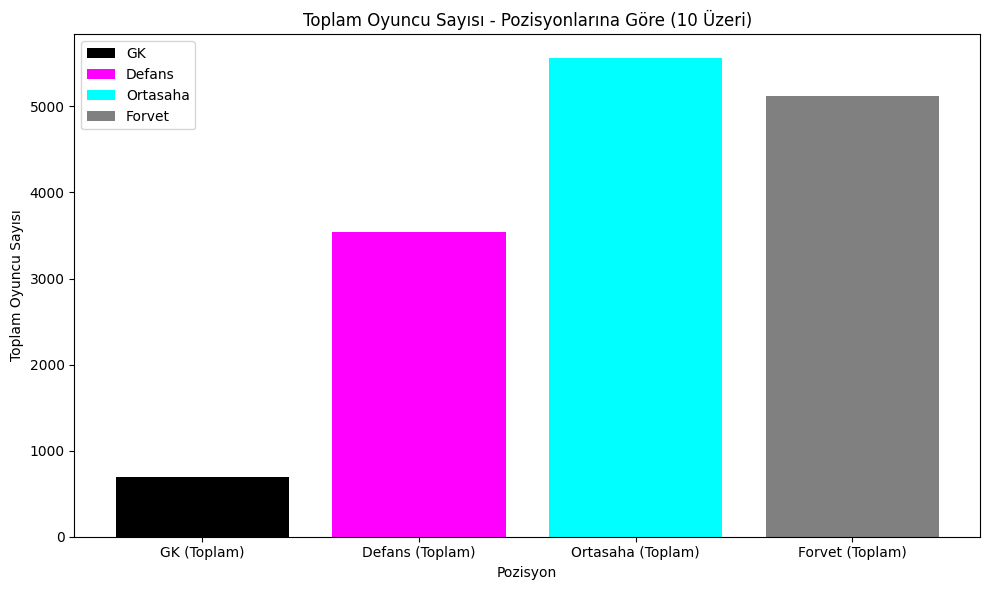

In [6]:
aim_value=10
# 'GK' pozisyonunda 10'dan fazla oyuncusu olanları seçme
gk = df[df['GK'] > aim_value]
total_gk = gk.shape[0]

# 'Defans' pozisyonunda 10'dan fazla oyuncusu olanları seçme
defence = df[(df['DL'] + df['DC'] + df['DR'] + df['WBL'] + df['WBR']) > aim_value]
total_defans = defence.shape[0]

# 'Ortasaha' pozisyonunda 10'dan fazla oyuncusu olanları seçme
midfield = df[(df['DM'] + df['ML'] + df['MC'] + df['MR']) > aim_value]
total_midfield = midfield.shape[0]

# 'Forvet' pozisyonunda 10'dan fazla oyuncusu olanları seçme
forvet = df[(df['AML'] + df['AMC'] + df['AMR'] + df['ST']) > aim_value]
total_forvet = forvet.shape[0]

# Grafik çizimi
plt.figure(figsize=(10, 6))

# Her pozisyon için çubuk grafikleri oluşturma
plt.bar('GK (Toplam)', total_gk, color='black', label='GK')
plt.bar('Defans (Toplam)', total_defans, color='magenta', label='Defans')
plt.bar('Ortasaha (Toplam)', total_midfield, color='cyan', label='Ortasaha')
plt.bar('Forvet (Toplam)', total_forvet, color='gray', label='Forvet')

plt.title(f'Toplam Oyuncu Sayısı - Pozisyonlarına Göre ({aim_value} Üzeri)')
plt.xlabel('Pozisyon')
plt.ylabel('Toplam Oyuncu Sayısı')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
df['Nationality'].replace({'United States': 'United States of America'}, inplace=True)
df['Nationality'].replace({'England': 'United Kingdom'}, inplace=True)
df['Nationality'].replace({'Republic of Ireland': 'Ireland'}, inplace=True)
df['Nationality'].replace({'China PR': 'China'}, inplace=True)




<ipython-input-8-4a40bd6117a5>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


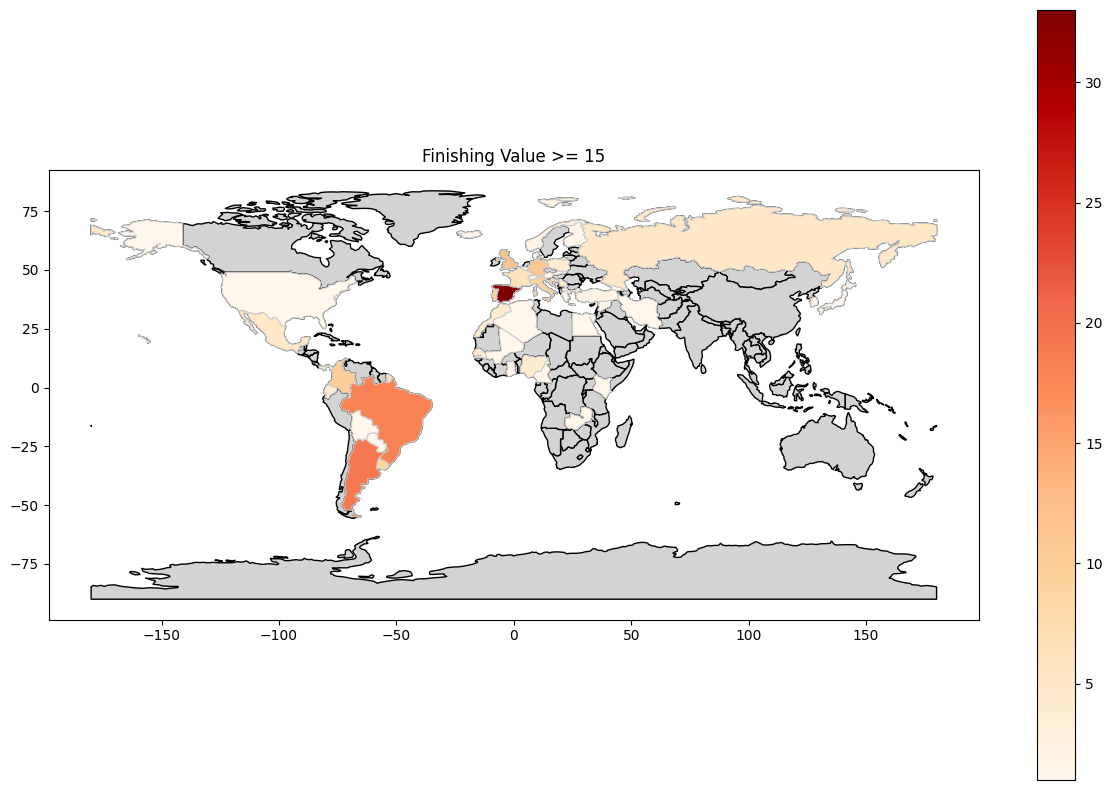

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

value = 15

# Ulke sınırları veri kümesini yükleyelim
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Eşik değerinin üzerindeki oyuncuları filtreleyelim
filtered_df = df[df['Finishing'] >= value]

# Oyuncu sayısını her bir ülke için hesaplayalım
players_per_country = filtered_df['Nationality'].value_counts().reset_index()
players_per_country.columns = ['Nationality', 'PlayerCount']

# Haritayı çizelim
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')

# Ülkeleri oyuncu sayısına göre ısı haritası olarak renklendirelim
world.merge(players_per_country, how='left', left_on='name', right_on='Nationality').plot(column='PlayerCount', cmap='OrRd',linewidth=0.8, ax=ax, edgecolor='0.8',legend=True)
plt.title(f'Finishing Value >= {value}')
plt.show()


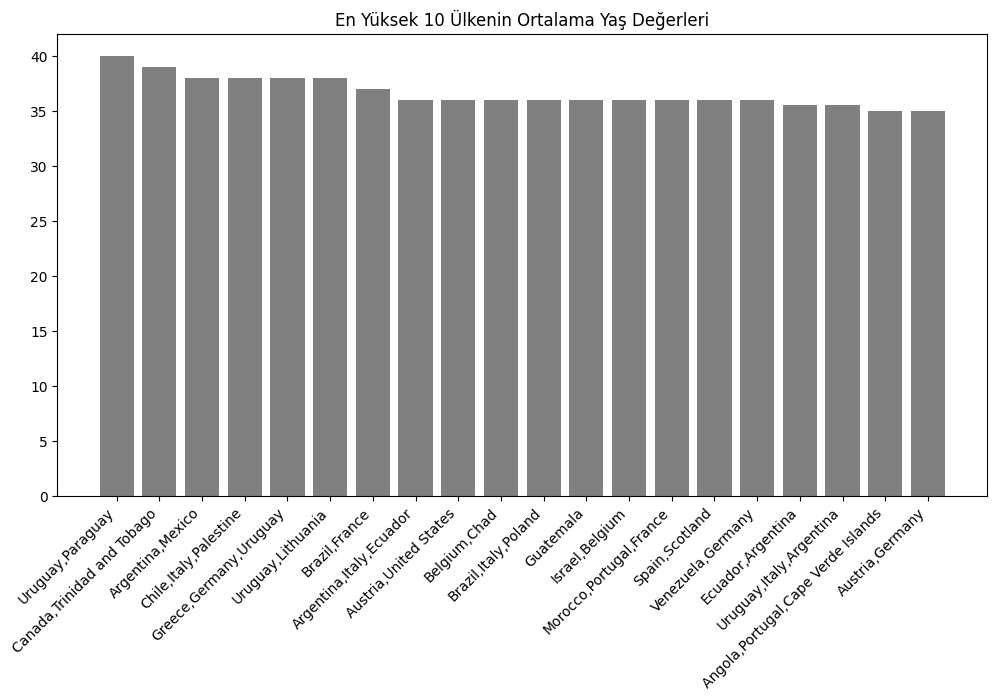

In [9]:
# Nationality sütununa göre yaş ortalamasını hesaplayalım
age_mean_per_country = df.groupby('Nationality')['Age'].mean().reset_index()

# En yüksek 10 ülkeyi seçelim
top_10_countries = age_mean_per_country.nlargest(20, 'Age')

# Çubuk grafik çizelim
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['Nationality'], top_10_countries['Age'], color='gray')
plt.title("En Yüksek 10 Ülkenin Ortalama Yaş Değerleri")
plt.xticks(rotation=45, ha='right')
plt.show()

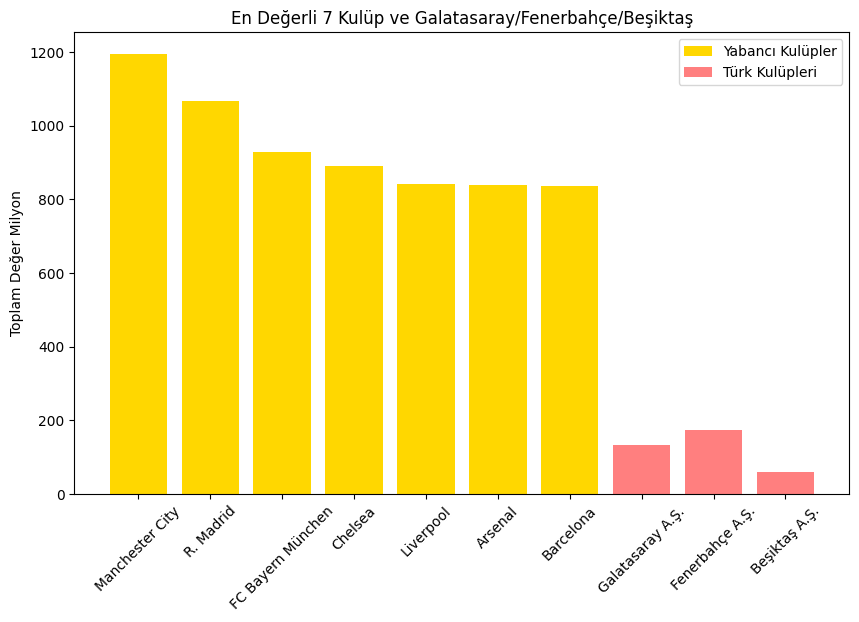

In [11]:
filtered_df = df[df['Values'] < 180]
# 180den küçük yaptık çünkü values sütunu
galatasaray_value = filtered_df[filtered_df['Club'] == 'Galatasaray A.Ş.']['Values'].sum()
fenerbahce_value = filtered_df[filtered_df['Club'] == 'Fenerbahçe A.Ş.']['Values'].sum()
besiktas_value = filtered_df[filtered_df['Club'] == 'Beşiktaş A.Ş.']['Values'].sum()

club_values = filtered_df.groupby('Club')['Values'].sum().reset_index()
top_clubs = club_values.nlargest(7, 'Values')


extra_clubs = ['Galatasaray A.Ş.', 'Fenerbahçe A.Ş.', 'Beşiktaş A.Ş.']
extra_values = [galatasaray_value, fenerbahce_value, besiktas_value]

plt.figure(figsize=(10, 6))
plt.bar(top_clubs['Club'], top_clubs['Values'], color='gold', label='Yabancı Kulüpler')
plt.bar(extra_clubs, extra_values, color='red', alpha=0.5, label='Türk Kulüpleri')  # Ekstra sütunlar
plt.title("En Değerli 7 Kulüp ve Galatasaray/Fenerbahçe/Beşiktaş")
plt.ylabel("Toplam Değer Milyon")
plt.xticks(rotation=45)
plt.legend()
plt.show()


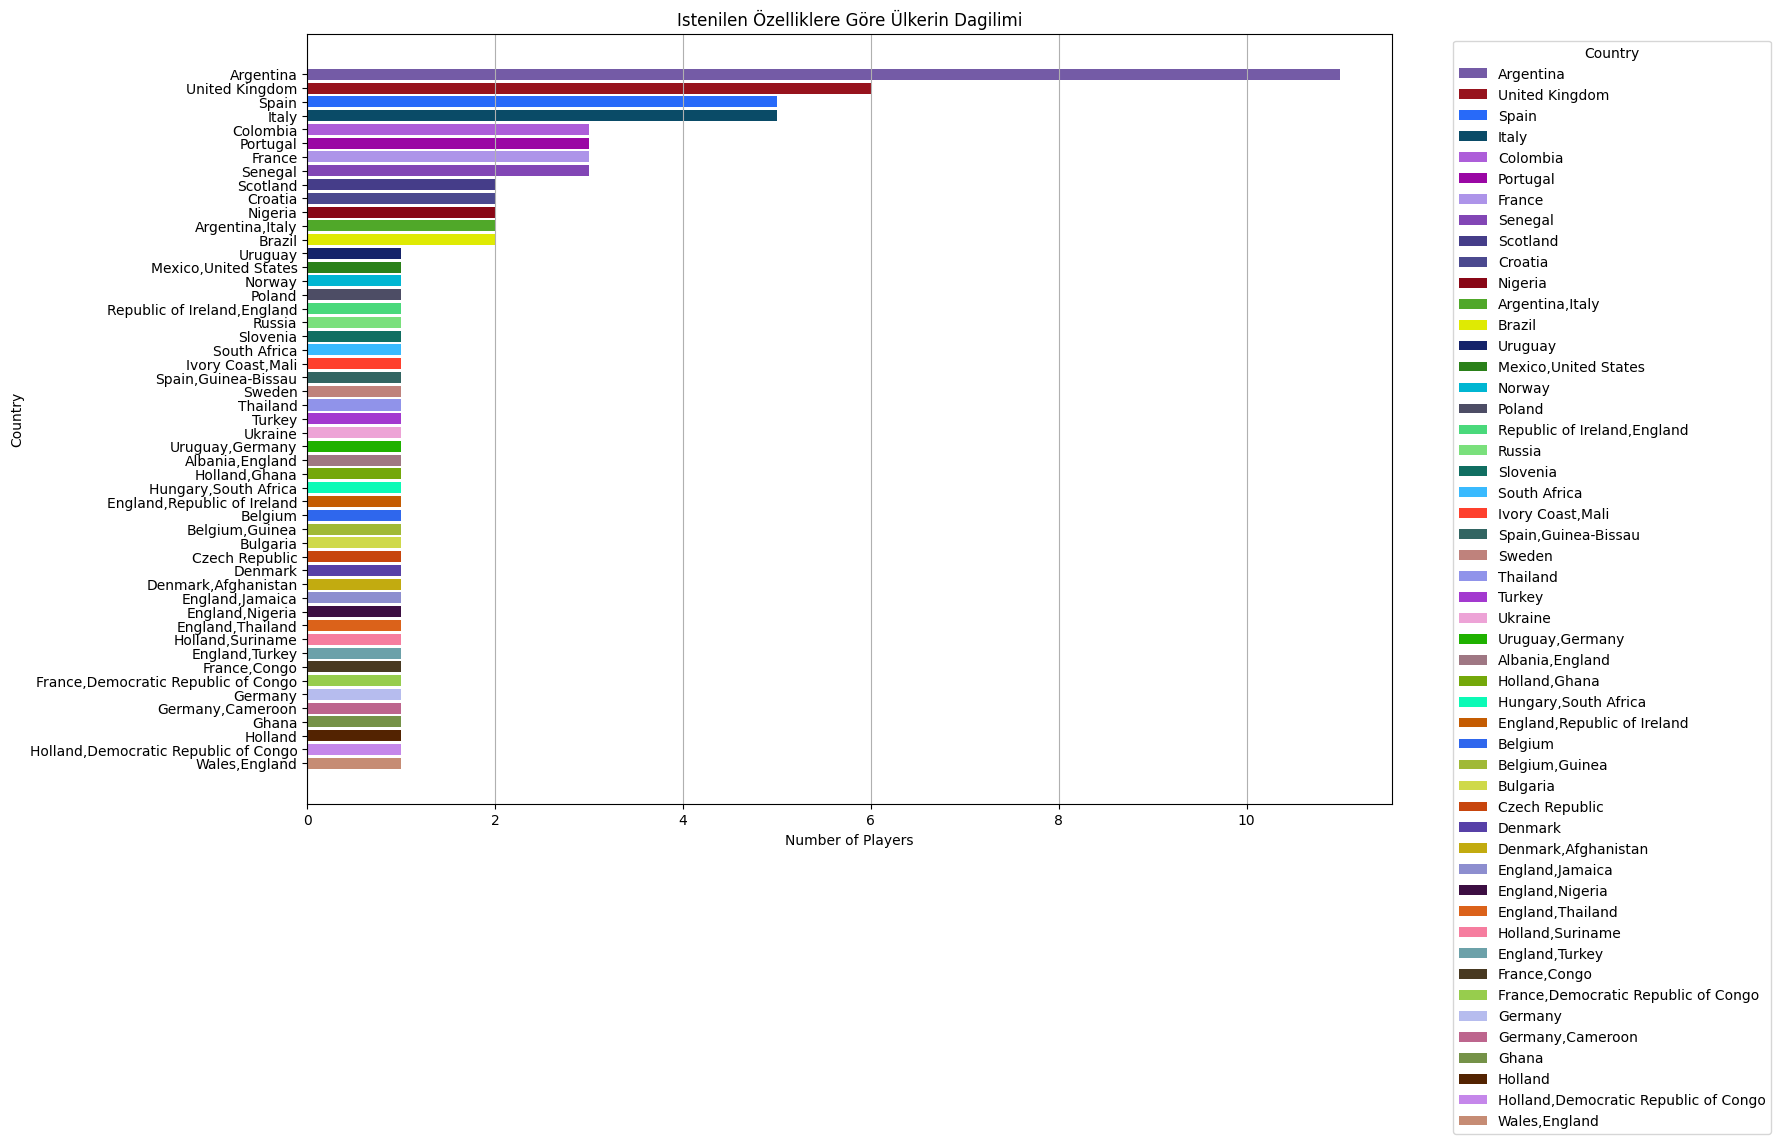

In [12]:
age=21
finishing=13

ulkeler_renkler = {'Türkiye': 'red', 'İspanya': 'blue', 'Fransa': 'green', 'Almanya': 'yellow'}  # Örnek renklendirme, dilediğiniz gibi güncelleyebilirsiniz


#Yaş sütunu 25'ten küçük ve bitiricilik sütunu 18'den fazla olan futbolcuları seç
filtrelenmis_veri = df[(df["Age"] < age) & (df["Finishing"] > finishing)]

#Her bir ülkenin futbolcu sayısını hesapla
ulke_futbolcu_sayisi = filtrelenmis_veri.groupby('Nationality').size().sort_values(ascending=False)



#Renkli kutunun oluşturulması
fig, ax = plt.subplots(figsize=(14, 10))
for i, (ulke, futbolcu_sayisi) in enumerate(ulke_futbolcu_sayisi.items()):
    renk = np.random.rand(3,)  # Rastgele bir RGB renk oluşturur
    ax.barh(i, futbolcu_sayisi, color=renk, label=ulke)

#Eksenleri düzenleme
ax.set_yticks(np.arange(len(ulke_futbolcu_sayisi)))
ax.set_yticklabels(ulke_futbolcu_sayisi.index)
ax.invert_yaxis()  # Ülkeleri büyükten küçüğe doğru sıralamak için yönü tersine çevir

#Görsel ayarlamalar
plt.xlabel('Number of Players')
plt.ylabel('Country')
plt.title('Istenilen Özelliklere Göre Ülkerin Dagilimi')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x')
plt.show()

In [13]:
forvet_fm=df[['Name','UID', 'Age', 'Nationality', 'Dribbling', 'Finishing', 'First Touch', 'Heading', 'Penalty Taking', 'Technique', 'Composure', 'Concentration',
              'Flair', 'Teamwork', 'Work Rate', 'Agility', 'Balance', 'Jumping Reach', 'Pace', 'Stamina', 'Strength', 'Stability', 'Position', 'Left Foot', 'Right Foot', 'Colour of skin','Values']]

In [14]:
forvet_fm = forvet_fm[forvet_fm['Position'].str.contains('S')]

#Pozisyonunda Forvet olmayan oyuncuları verisetinden çıkarttık.
print(forvet_fm)

                    Name         UID  Age     Nationality  Dribbling  \
1          Kylian Mbappé    85139014   23          France         18   
2     Robert Lewandowski      719601   33          Poland         13   
3         Erling Haaland    29179241   22  Norway,England         14   
4          Mohamed Salah    98028755   30           Egypt         17   
5          Karim Benzema     8435089   34  France,Algeria         16   
...                  ...         ...  ...             ...        ...   
8439     Roman Mokrovics  2000226691   16  Czech Republic         10   
8440       Ştefan Moraru  2000094153   17         Romania         13   
8448          River Ries  2000197059   17         Germany         11   
8450        Adijat Sefer  2000197383   17         Germany         12   
8451         Linus Urban  2000194686   17         Germany         10   

      Finishing  First Touch  Heading  Penalty Taking  Technique  ...  \
1            17           18        7              18         

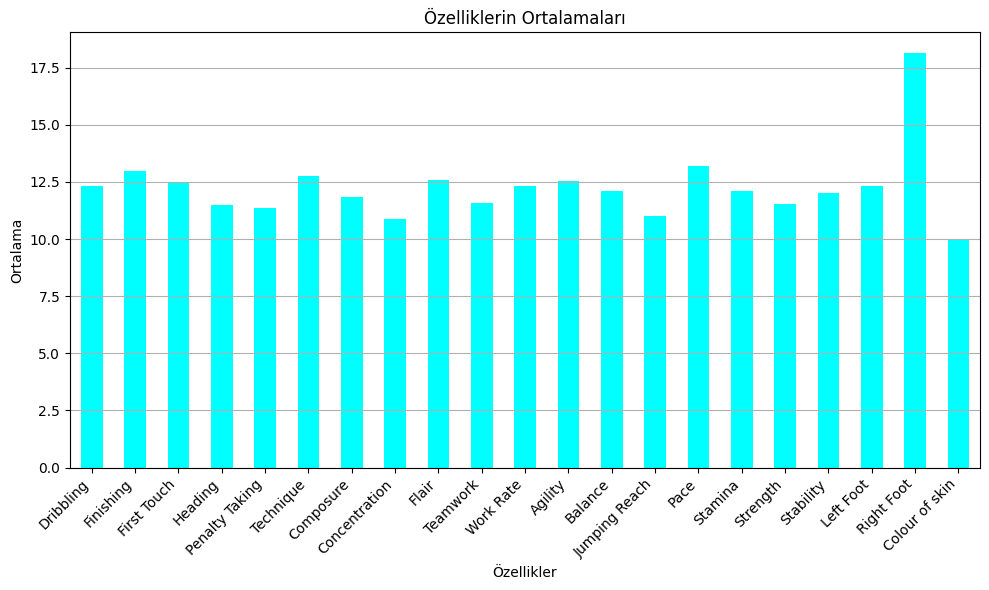

In [15]:
ortalamalar = forvet_fm[['Dribbling', 'Finishing', 'First Touch', 'Heading', 'Penalty Taking', 'Technique', 'Composure', 'Concentration', 'Flair', 'Teamwork', 'Work Rate', 'Agility', 'Balance', 'Jumping Reach', 'Pace', 'Stamina', 'Strength', 'Stability', 'Left Foot', 'Right Foot','Colour of skin',]].mean()

# Ortalamaları görselleştirme
plt.figure(figsize=(10, 6))
ortalamalar.plot(kind='bar', color='cyan')
plt.title('Özelliklerin Ortalamaları')
plt.xlabel('Özellikler')
plt.ylabel('Ortalama')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()